In [74]:
# Import the AudioSegment class for processing audio and the 
# split_on_silence function for separating out silent chunks.
from pydub import AudioSegment 
from pydub.silence import split_on_silence
import numpy as np, matplotlib.pyplot as plot, librosa, librosa.display, sklearn
from sklearn.mixture import GaussianMixture as GMM

In [75]:
#normalize a chunk to a target amplitude.
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

#silence removal, normalization and trimming
def remove_silence(path):
    # Load your audio.
    song = AudioSegment.from_file(path)
    final_chunk=AudioSegment.empty()
    # Split track where the silence is 3 seconds or more and get chunks using 
    # the imported function.
    chunks = split_on_silence (
        # Use the loaded audio.
        song, 
        # Specify that a silent chunk must be at least 3 seconds or 3000 ms long.
        min_silence_len = 3000,
        # Consider a chunk silent if it's quieter than -16 dBFS.
        # (You may want to adjust this parameter.)
        silence_thresh = -30
    )
    
    # Process each chunk with your parameters
    for i, chunk in enumerate(chunks):

        # Normalize the entire chunk.
        normalized_chunk = match_target_amplitude(chunk, -20.0)

        #final chunk made by joining all non silent chunks
        final_chunk+=normalized_chunk
    
    # trimming the song, taking only 1 sec from beginning
    final_song = final_chunk[:3000]

    #convert the song into numpy array
    song_array = final_song.get_array_of_samples()
    song_array = np.array(song_array)
    return song_array

In [81]:
#extracting mfccs and scaling them
def scaled_mfccs(song_array):
    song_array = song_array.astype(float)
    mfccs = librosa.feature.mfcc(song_array)

    mfccs.shape

    #scaling the MFCCs such that each coefficient dimension has zero mean and unit variance
    mfccs = sklearn.preprocessing.scale(mfccs,axis =1)
    return mfccs

In [83]:
#training dataset location text file
location = "/media/abhiroopd/New Volume/audio/"
#5 songs per singer, each has mfccs of size 20x130, we stack them vertically
features = np.empty([100, 130])
count = 1 
i = 0
with open("train.txt", "r") as training_file:
    for path in training_file:
        #remove leading and trailing spaces
        path = path.strip()
        song_array = remove_silence(location+path)
        mfccs = scaled_mfccs(song_array)
        
#         if(count <= 5):
#             features[i:i+20, :] = mfccs
#             i = i+1
#         if(count == 5):    
#             gmm =  GMM(n_components=3).fit(features)   
#             count = 0
#             i = 0
#         count = count+1    

/home/abhiroopd/Documents/programs/singer_identification/lib/python3.6/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/abhiroopd/Documents/programs/singer_identification/lib/python3.6/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


[[ 1.3632306   1.640806    1.3988211  ...  0.66394186  1.5969443
   2.0215106 ]
 [ 0.37253585  0.07678032 -0.6415382  ... -1.4644393   1.5414789
   2.770458  ]
 [ 1.4303244   1.1954463   1.0692059  ...  0.05693255  2.1774147
   2.6333504 ]
 ...
 [-1.1161904  -1.4201326  -2.0173247  ... -0.8784792  -0.07393476
   0.3094097 ]
 [ 0.5544368   0.7905632   0.94015706 ... -1.5071517   0.8284061
   1.3935202 ]
 [ 0.93948853  0.69394344  0.44644436 ... -1.431064   -0.18187514
  -0.04670621]]


/home/abhiroopd/Documents/programs/singer_identification/lib/python3.6/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/abhiroopd/Documents/programs/singer_identification/lib/python3.6/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


[[-0.86812305 -0.14651388  0.5256825  ... -0.6557807  -0.11671276
   0.2372389 ]
 [ 1.9533459   1.7237003   0.96105367 ...  0.39567235  1.2583448
   1.5095646 ]
 [ 2.6054204   1.9208101   0.5414626  ... -0.6737387   0.6223404
   0.8870935 ]
 ...
 [ 0.13251121 -1.1241282  -2.6743999  ...  0.09646544  1.3682125
   1.946963  ]
 [ 0.31433728  0.35491377  0.41019085 ...  1.6144633   2.277802
   2.3501828 ]
 [-0.301741   -1.1891048  -0.7515703  ... -0.64783365  0.09245215
   0.43651664]]


/home/abhiroopd/Documents/programs/singer_identification/lib/python3.6/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/abhiroopd/Documents/programs/singer_identification/lib/python3.6/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


[[ 1.3380598   1.8252403   1.5666443  ... -2.1518672  -1.380274
  -1.1673095 ]
 [-2.4982097  -1.7650446  -1.3441982  ...  0.8566334   1.7995794
   1.9716705 ]
 [ 1.6964304   1.4386306   0.7018656  ... -0.22939736  1.4453534
   2.115191  ]
 ...
 [ 0.2668121   1.2826799   1.7621355  ...  0.20969066  0.5819429
   0.5124278 ]
 [ 0.27180538  1.0343214   2.0783222  ... -0.45561332  0.4474427
   0.5079907 ]
 [ 1.310947    1.9063574   2.6584659  ...  0.60135686  1.1179394
   1.3788754 ]]


/home/abhiroopd/Documents/programs/singer_identification/lib/python3.6/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/abhiroopd/Documents/programs/singer_identification/lib/python3.6/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


[[-7.3485827e-01 -9.7216308e-02  4.1023374e-01 ...  2.6480585e-01
   1.0144421e+00  1.4217718e+00]
 [-5.1493722e-01 -1.3203521e+00 -1.9737813e+00 ... -7.9583354e-02
   8.3350372e-01  1.3398709e+00]
 [ 2.0318009e-01  1.2899083e+00  1.9120281e+00 ... -5.7398075e-01
   6.6052705e-01  1.0117389e+00]
 ...
 [ 1.1302150e+00  9.8039860e-01  1.7427371e-01 ...  2.3688822e+00
   1.9404302e+00  1.7384697e+00]
 [ 4.4696921e-01 -1.7309082e-01 -8.3614903e-04 ... -1.0496061e+00
  -9.7383296e-01 -6.4700717e-01]
 [ 4.9684444e-01  5.3546751e-01  6.2295783e-01 ... -1.7615104e+00
  -1.5168983e+00 -1.3484982e+00]]


KeyboardInterrupt: 

[-202  -96  114 ...    0    0    0]


/home/abhiroopd/Documents/programs/singer_identification/lib/python3.6/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/abhiroopd/Documents/programs/singer_identification/lib/python3.6/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


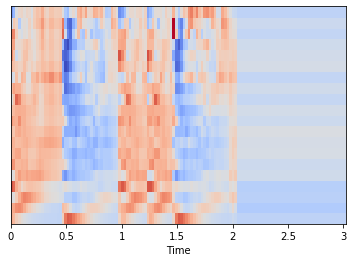

In [89]:
song_array = remove_silence('download.wav')
print(song_array)
mfccs = scaled_mfccs(song_array)
librosa.display.specshow(mfccs, x_axis='time')
plot.show()